# Modeling

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [18]:
df.head()

,Uy_narxi,Uy_maydoni,Тип жилья:,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Oy_yil,Oy,Kvmetr_narxi,text3,Ta'miri,Комиссионные:,Меблирована:
0,30000.0,30.0,Вторичный рынок,1,1,4,G'isht,Mirzo Ulug‘bek,11-2023,11,1000.000000,буюк ипак йули 114 бывший общага ремонтом 3000...,To'liq tamirlangan,Нет,Да
1,49000.0,40.0,Вторичный рынок,1,4,5,Panel,Mirzo Ulug‘bek,11-2023,11,1225.000000,продаю одна комнатная квартира балкон 2х3с меб...,To'liq tamirlangan,Да,Да
2,49000.0,32.0,Вторичный рынок,1,3,4,Panel,Mirzo Ulug‘bek,11-2023,11,1531.250000,ялонгач 134монолитплощадь 32м2остатся вся техн...,To'liq tamirlangan,Да,Да
3,87000.0,45.0,Вторичный рынок,1,3,4,G'isht,Mirzo Ulug‘bek,11-2023,11,1933.333333,продатся 1 комнатная переделанная в 2 комнатну...,To'liq tamirlangan,Нет,Нет
4,51500.0,44.0,Вторичный рынок,1,5,5,Monolit,Mirzo Ulug‘bek,11-2023,11,1170.454545,продатся 155 квартира мв ттзюгнаки хумаюн мирз...,To'liq tamirlangan,Нет,Да


In [19]:
# drop columns that Тип жилья: , text3, Kvmetr_narxi
df = df.drop(["Тип жилья:", "text3", "Kvmetr_narxi", "Oy"], axis=1)

In [20]:
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Oy_yil,Ta'miri,Комиссионные:,Меблирована:
0,30000.0,30.0,1,1,4,G'isht,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Нет,Да
1,49000.0,40.0,1,4,5,Panel,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Да,Да
2,49000.0,32.0,1,3,4,Panel,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Да,Да
3,87000.0,45.0,1,3,4,G'isht,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Нет,Нет
4,51500.0,44.0,1,5,5,Monolit,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Нет,Да


In [21]:
df['Oy_yil'].unique()

array(['11-2023', '11-2024'], dtype=object)

In [22]:
# filter df with Oy_yili columns elements
df = df[df["Oy_yil"] == "11-2024"]
# drop Oy_yili column
df = df.drop("Oy_yil", axis=1)
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Ta'miri,Комиссионные:,Меблирована:
66288,130000.0,80.0,3,2,4,G'isht,Yunusobod,To'liq tamirlangan,Да,Да
66289,75000.0,80.0,3,6,9,Panel,Yunusobod,To'liq tamirlangan,Нет,Да
66290,72499.0,78.0,3,5,5,Panel,Yunusobod,To'liq tamirlangan,Нет,Да
66291,108000.0,70.0,3,4,4,G'isht,Yunusobod,To'liq tamirlangan,Нет,Нет
66294,105000.0,77.0,3,3,9,Panel,Yunusobod,To'liq tamirlangan,Нет,Нет


In [23]:
# filter df with 'Xonalar_soni' column's element
df = df[df["Xonalar_soni"] <= 4]

In [24]:
# dummify categorical columns like 0 , 1

# df = pd.get_dummies(df, columns=["Uy_turi","Ta'miri","Tuman"], dtype=int)
# df.head()
# make label incoding columns - "Uy_turi","Ta'miri","Tuman"


from sklearn.preprocessing import LabelEncoder

# Ma'lumotlar
categorical_columns = ["Uy_turi", "Ta'miri", "Tuman","Комиссионные:","Меблирована:"]  # Kategorik ustunlar
label_encoders = {}  # Har bir ustun uchun LabelEncoder ob'ektlarini saqlash

# Har bir kategorik ustunni Label Encoding qilish
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # O'rganish va kodlash
    label_encoders[col] = le  # Encoderni saqlash (agar keyinchalik kerak bo'lsa)

# Natijani ko'rish
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Ta'miri,Комиссионные:,Меблирована:
66288,130000.0,80.0,3,2,4,1,10,4,0,0
66289,75000.0,80.0,3,6,9,3,10,4,1,0
66290,72499.0,78.0,3,5,5,3,10,4,1,0
66291,108000.0,70.0,3,4,4,1,10,4,1,1
66294,105000.0,77.0,3,3,9,3,10,4,1,1


In [25]:
# make X_train and X_test with using train test split
from sklearn.model_selection import train_test_split
X = df.drop("Uy_narxi", axis=1)
y = df["Uy_narxi"]

In [26]:
# make random forest model with x and y
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an instance of the RandomForestRegressor class
rf_model = RandomForestRegressor() # Added parentheses to create an instance
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 149576211.05960512
R-squared: 0.8321272331620932


#Features importance

Uy_maydoni: 0.6503475519311558
Xonalar_soni: 0.020235680957356863
Qavati: 0.06415196574260056
Uy_qavatliligi: 0.03647914608906118
Uy_turi: 0.028898964166146106
Tuman: 0.09600726698060452
Ta'miri: 0.07119767609360368
Комиссионные:: 0.007846731338684482
Меблирована:: 0.024835016700786968


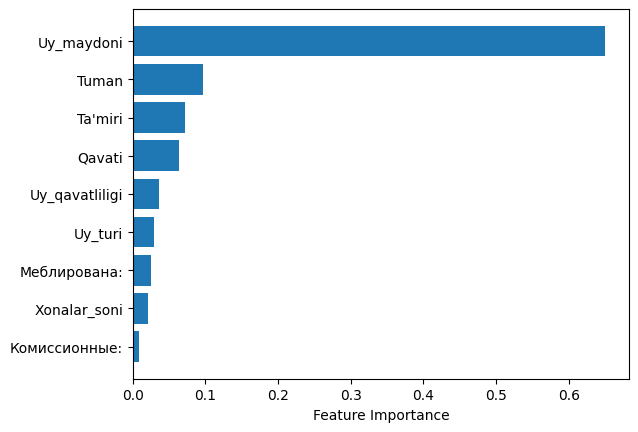

In [27]:
sort = rf_model.feature_importances_.argsort()

plt.barh(X_train.columns[sort], rf_model.feature_importances_[sort]) # Use X_train.columns instead of df.feature_names

plt.xlabel("Feature Importance")

# view the importance level of columns in numbers
for i, v in enumerate(rf_model.feature_importances_):
    print(f"{X_train.columns[i]}: {v}")

In [ ]:
# Qismlarni alohida o'zgaruvchilarga saqlash
part1, part2, part3, part4 = parts

In [ ]:
# X_test subtracting a fraction from 4
choosen_instance = part1
shap_values = explainer.shap_values(choosen_instance)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

In [ ]:
# Calculate SHAP values for the same data you want to visualize
shap_values = explainer.shap_values(X_train)  # Use X_train instead of choosen_instance

# Now, the summary plot should work correctly
shap.summary_plot(shap_values, X_train)

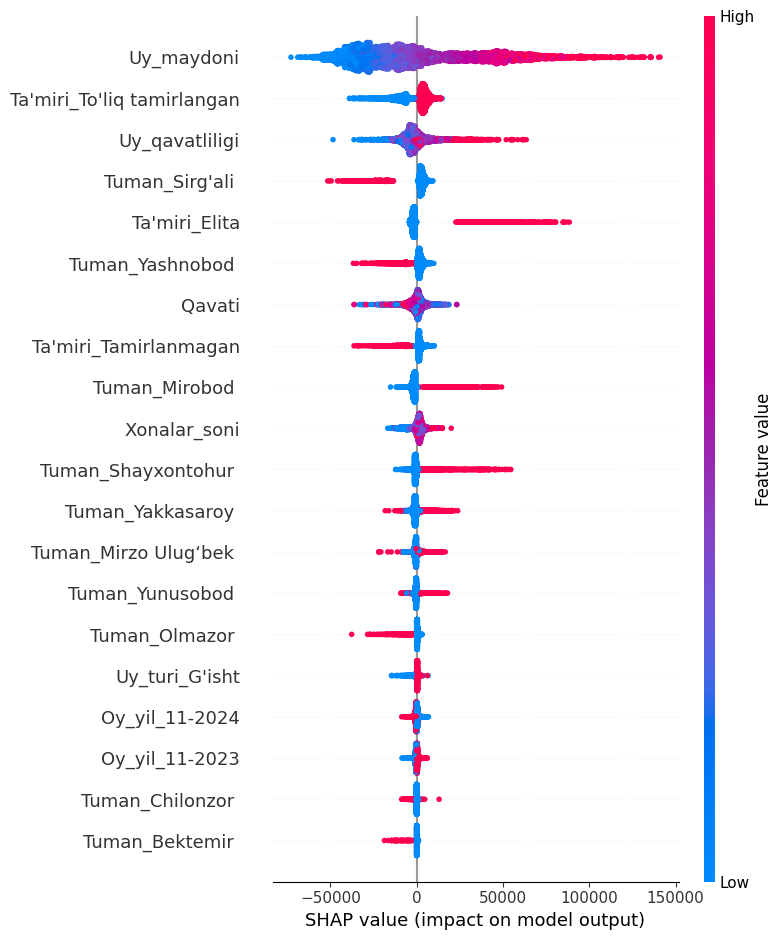

In [ ]:
# make SHAP values with rf_model , and show the features importances
import shap
shap_values = shap.TreeExplainer(rf_model).shap_values(X_test)
shap.summary_plot(shap_values, X_test)